<a href="https://colab.research.google.com/github/Batman511/Neural-networks-homeworks/blob/main/%D0%94%D0%97_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BA%D0%B8_17_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

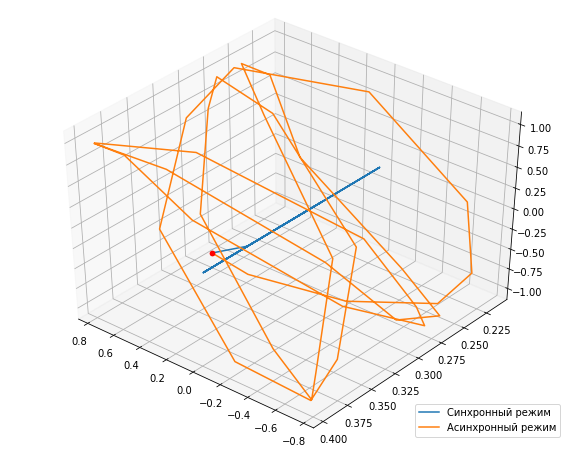

In [ ]:
graph(40)

In [ ]:
def start_fun(x):
  # return 0
  # return 1/x
  return np.sin(np.pi*x/10)
def y_start(foo):
  return np.array([foo(1), 0.1, 0.1, 0.1])

def activation_1(x):
  return  np.tanh(x)
def activation_2(x):
  return( norm.pdf(x, scale = 1) )
def activation_3(x):
  return  np.tanh(x)  

# коэффициенты:
choice = 4
if choice == 0:
  # default
  weights_1 = np.array([1, -0.5, 0.2, 0.7])
  weights_2 = np.array([-1, -0.4, 0.1, -0.5])
  weights_3 = np.array([0, -0.3, 1.2, 0.5])  
elif choice == 1:
  # устойчивое состояние
  weights_1 = np.array([1, -0.5, 0.2, 0.7])
  weights_2 = np.array([1, 0.2, 0.1, 1.2])
  weights_3 = np.array([0, -0.3, -0.5, 0.5])
elif choice == 2:
  # состояние насыщения  
  weights_1 = np.array([1, -0.5, 0.2, 0.7])
  weights_2 = np.array([-1, 0.2, 0.9, 0.2])
  weights_3 = np.array([0, -0.3, -0.5, 0.5])
elif choice == 3:
  # цикл
  weights_1 = np.array([1, 0, 0, 1])
  weights_2 = np.array([-1, 1, 0, 0])
  weights_3 = np.array([0, 0.2, 0.5, 1])
elif choice == 4:
  # хаос
  weights_1 = np.array([0, 0, 0, 1])
  weights_2 = np.array([1, 0, 0.5, 0])
  weights_3 = np.array([0, -3.6, 0, 3.6])

In [ ]:
def cicle_asynchronous(n):
  y0 = y_start(start_fun)
  y = np.zeros(4)
  for i in range(n):
    y[0] = start_fun(i+1)
    y[1] = activation_1(np.dot(y0, weights_1))
    y[2] = activation_2(np.dot(y0, weights_2))
    y[3] = activation_3(np.dot(y0, weights_3))
    y0 = y.copy()
  return y

def cicle_synchronous(n):
  y0 = y_start(start_fun)
  y = np.zeros(4)
  for i in range(n):
    y[0] = start_fun(i+1)
    y[1] = activation_1(np.dot(y0, weights_1))
    y0[1] = y[1]
    y[2] = activation_2(np.dot(y0, weights_2))
    y0[2] = y[2]
    y[3] = activation_3(np.dot(y0, weights_3))
    y0[3] = y[3]
    y0 = y.copy()
  return y
  
# print(cicle_asynchronous(1))
# print(cicle_synchronous(1))

def graph(n):
  # n - число тактов
  list_synchronous=[]
  list_asynchronous=[]
  for i in range(1,n+1):
    list_synchronous.append(cicle_synchronous(i))
    list_asynchronous.append(cicle_asynchronous(i))

  axis_x=[]  
  axis_y=[]  
  axis_z=[]  
  axis_x2=[]  
  axis_y2=[]  
  axis_z2=[]  
  for i in range(n):
    axis_x.append(list_synchronous[i][1])
    axis_y.append(list_synchronous[i][2])
    axis_z.append(list_synchronous[i][3])

    axis_x2.append(list_asynchronous[i][1])
    axis_y2.append(list_asynchronous[i][2])
    axis_z2.append(list_asynchronous[i][3])


  fig = plt.figure(figsize=(10,8))
  ax = plt.axes(projection='3d')
  ax.plot3D(axis_x, axis_y, axis_z, label='Синхронный режим')
  ax.plot3D(axis_x2, axis_y2, axis_z2, label='Асинхронный режим')
  ax.view_init(40, 130) # (высота,угол)   изменение угла обзора
  ax.scatter(axis_x[0], axis_y[0], axis_z[0],color='red')
  ax.scatter(axis_x2[0], axis_y2[0], axis_z2[0],color='red')
  ax.legend(loc='lower right')